<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка." data-toc-modified-id="Подготовка.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка.</a></span><ul class="toc-item"><li><span><a href="#Удаление-неинформативных-признаков:" data-toc-modified-id="Удаление-неинформативных-признаков:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удаление неинформативных признаков:</a></span></li><li><span><a href="#Проверка-на-наличие-пропусков:" data-toc-modified-id="Проверка-на-наличие-пропусков:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на наличие пропусков:</a></span></li><li><span><a href="#Проверка-на-дубликаты:" data-toc-modified-id="Проверка-на-дубликаты:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка на дубликаты:</a></span></li><li><span><a href="#Проверка-на-баланс-классов:" data-toc-modified-id="Проверка-на-баланс-классов:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на баланс классов:</a></span></li><li><span><a href="#Лемматизация-и-чистка-текста:" data-toc-modified-id="Лемматизация-и-чистка-текста:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Лемматизация и чистка текста:</a></span></li><li><span><a href="#Дополнительное-исследование:" data-toc-modified-id="Дополнительное-исследование:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Дополнительное исследование:</a></span><ul class="toc-item"><li><span><a href="#Гистограмма-распределения-Пуассона,:" data-toc-modified-id="Гистограмма-распределения-Пуассона,:-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Гистограмма распределения Пуассона,:</a></span></li><li><span><a href="#График-XYZ-в-сравнении-с-распределением-Пуассона:" data-toc-modified-id="График-XYZ-в-сравнении-с-распределением-Пуассона:-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>График <em>XYZ</em> в сравнении с распределением Пуассона:</a></span></li><li><span><a href="#Облако-слов:" data-toc-modified-id="Облако-слов:-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Облако слов:</a></span></li></ul></li><li><span><a href="#Разделение-данных-на-выборки:" data-toc-modified-id="Разделение-данных-на-выборки:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Разделение данных на выборки:</a></span></li><li><span><a href="#Вывод-блока:" data-toc-modified-id="Вывод-блока:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span><strong>Вывод блока:</strong></a></span></li></ul></li><li><span><a href="#Обучение." data-toc-modified-id="Обучение.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение.</a></span><ul class="toc-item"><li><span><a href="#Вывод-блока:" data-toc-modified-id="Вывод-блока:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Вывод блока:</strong></a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели." data-toc-modified-id="Тестирование-лучшей-модели.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование лучшей модели.</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Общий вывод:</strong></a></span></li></ul></div>

___
# Проект для «Викишоп»

**Описание задачи:** 

Интернет-магазин «Викишоп» запускает новый сервис. Их пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Цель исследования:**  

Построить модель, классифицирующую комментарии на позитивные и негативные, со значением метрики качества `F1` не меньше 0.75. 

**Ход исследования:**
1. Загрузим данные и проверим на наличие пропусков и дубликатов.
2. Удалим неинформативные признаки.
3. Проверим баланс классов.
4. Проведем лемматизацию и чистку текста.
5. Разделим данные на выборки.
6. Проведем углубленное исследование данных.
7. Создадим пайплайны для проверки нескольких способов предварительной подготовки корпуса:
* с использованием мешка слов и параметра TF-IDF
* с отсечением стоп-слов и без отсечения
8. Произведем их оценку метрикой качества на Логистической Регрессии и выберем лучший. 
9. Протестируем несколько, разных моделей и подберем гиперпараметры для лидера.
10. Проверим прогнозы лучшей модели на тестовой выборке.

**Таким образом, исследование пройдёт в три этапа:**

1. Загрузка и подготовка данных.
2. Обучение моделей. 
3. Тестирование лучшей модели.


**Описание данных**
В нашем распоряжении набор данных с разметкой о токсичности правок, столбцы:

* `text` - содержит текст комментария
*  `toxic` — целевой признак.

___
## Подготовка.

In [1]:
import sys
!{sys.executable} -m pip install spacy

!{sys.executable} -m spacy download en

!pip install -q wordcloud

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl#egg=en_core_web_sm==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
!pip install --upgrade pip

!pip install --upgrade Pillow

  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/50/e5/0d484d1ac71b934638f91b7156203ba5bf3eb12f596b616a68a85c123808/Pillow-10.0.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata
  Using cached Pillow-10.0.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata (9.5 kB)
Using cached Pillow-10.0.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0


In [3]:
import pandas as pd
import numpy as np
import warnings
import re
import time

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords  
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from tqdm.notebook import tqdm
import spacy
from scipy.stats import poisson

In [4]:
warnings.filterwarnings('ignore')

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv(r'/DataSets/toxic_comments.csv')

In [7]:
warnings.filterwarnings('ignore')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [9]:
data.tail()

,Unnamed: 0,text,toxic
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0
159291,159450,"""\nAnd ... I really don't think you understand...",0


___
### Удаление неинформативных признаков:
Проверим распределение данных признака Unnamed: 0 на монотонность

In [10]:
data['Unnamed: 0'].is_monotonic

True

Данный столбец фактически повторяет индекс, можно предположить, что эта колонка была индексом до обработки, поэтому удалим ее. 

In [11]:
data = data.drop('Unnamed: 0', axis=1)
data.dtypes

text     object
toxic     int64
dtype: object

___
### Проверка на наличие пропусков:

In [12]:
display('Количество пропусков:', data.isna().sum())

'Количество пропусков:'

text     0
toxic    0
dtype: int64

___
### Проверка на дубликаты:

In [13]:
print('Количество дубликатов:\n', data.duplicated().sum())

Количество дубликатов:
 0


___
### Проверка на баланс классов:
Посмотрим сколько токсичных комментариев во всем датасе в процентном соотношении:

In [14]:
data['toxic'].value_counts(normalize=True).round(3)

0    0.898
1    0.102
Name: toxic, dtype: float64

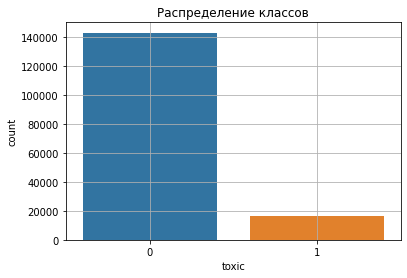

In [15]:
sns.countplot(data=data, x='toxic')
plt.title('Распределение классов')
plt.grid()
plt.show()

* Как можем наблюдать присутствует сильный дисбаланс классов, токсичных комментариев мало, они составляют лишь десятую часть от всех данных. 

Для соблюдения баланса при разделении данных на обучающую и тестовую выборки проведем стратификацию по таргету и при построении моделей будем учитывать параметр `class_weight=balanced`.  


___
### Лемматизация и чистка текста:

In [16]:
lemmatizer = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [17]:
def clear_lemmatize_text(text):
    d = " ".join([token.lemma_ for token in lemmatizer(text.lower())])
    return " ".join(re.sub(r'[^a-zA-Z]', ' ', d).split())

In [18]:
tqdm.pandas()
data['lemm_text'] = data['text'].progress_apply(clear_lemmatize_text)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [19]:
data['lemm_text'].head(10)

0    explanation why the edit make under my usernam...
1    d aww he match this background colour I be see...
2    hey man I be really not try to edit war it be ...
3    more I can not make any real suggestion on imp...
4    you sir be my hero any chance you remember wha...
5    congratulation from I as well use the tool wel...
6         cocksucker before you piss around on my work
7    your vandalism to the matt shirvington article...
8    sorry if the word nonsense be offensive to you...
9    alignment on this subject and which be contrar...
Name: lemm_text, dtype: object

____
### Дополнительное исследование:

In [20]:
# подсчитываем кол-во слов в текстах
word_counts = data['text'].apply(lambda x: len(x.split()))
word_counts.describe()

count    159292.000000
mean         67.213545
std          99.133908
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: text, dtype: float64

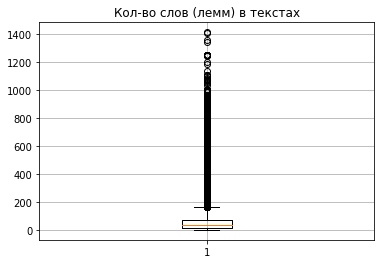

In [21]:
# строим диаграмму размаха,
# визуализируем распределение данных
plt.boxplot(word_counts.values)
plt.grid(True)
plt.title('Кол-во слов (лемм) в текстах');

___
#### Гистограмма распределения Пуассона,:

* среднее значение `mu` будет равняться средней длинне текстов, а `sample size` будет равен длинне датасета

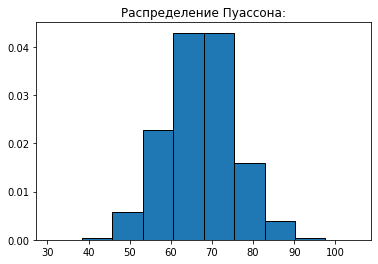

In [22]:
data_len = len(data)
x = poisson.rvs(mu=67, size=data_len)

plt.hist(x, density= True , edgecolor='black')
plt.title('Распределение Пуассона:')
plt.show()

**Выводы по данным и графику:**

* в среднем один текст содержит 67 слов (лемм)
* 25% текстов очень короткие и содержат до 17 слов (лемм)
* половина текстов содержат до 36 слов
* 75% текстов содержат до 75 слов
* имеются выбросы, максимальное кол-во слов в тексте = 1 411
___

___
#### График *XYZ* в сравнении с распределением Пуассона:

Построим график xyz, где по оси Х покажем количество слов, а по оси Y - количество текстов в которых встречается такое количество слов и сравним с распредлением Пуассона.


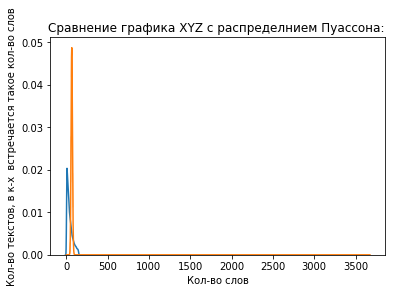

In [23]:
x = word_counts.value_counts().sort_index()
sns.kdeplot(word_counts[word_counts.values < 150])
sns.lineplot(x, poisson.pmf(x, 67))
sns.set(rc={'figure.figsize':(10,10)})

plt.title('Сравнение графика XYZ с распределнием Пуассона: ')
plt.xlabel('Кол-во слов')
plt.ylabel('Кол-во текстов, в к-х  встречается такое кол-во слов')
plt.show()


 ___
 **Вывод:**
 * Наше распределение кол-ва слов скошено, а распределние Пуассона близко к нормальному распрделению.
 ___

___
#### Облако слов:

In [24]:
stop_words = list(stopwords.words('english'))

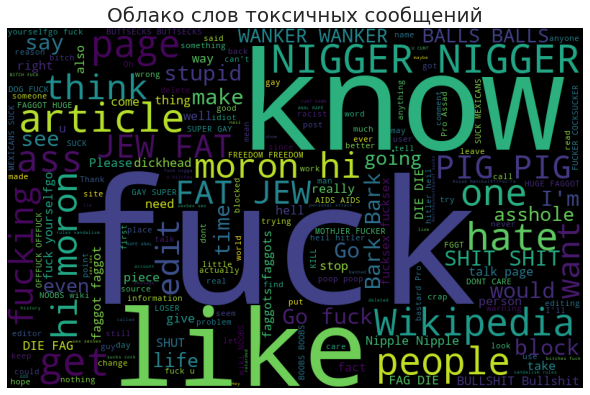

In [25]:
# визуализируем облако слов в текстах с токсичной коннотацией 

words_list = data[data['toxic']==1]['text'].unique().tolist()
pos_words = " ".join(words_list)
 
pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)
 
plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Облако слов токсичных сообщений', fontsize=20);

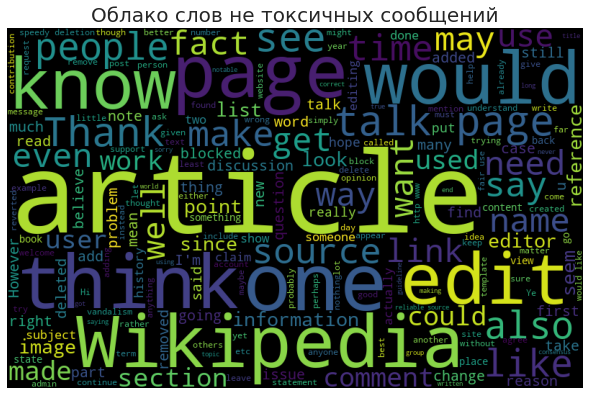

In [26]:
# визуализируем облако слов в текстах с не токсичной коннотацией 
words_list = data[data['toxic']==0]['text'].unique().tolist()
pos_words = " ".join(words_list)
 
pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)
 
plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Облако слов не токсичных сообщений', fontsize=20);

___
- Cразу становится понятно, почему работает подход "мешок слов": 
  - в токсичных и нетоксичных текстах преобладают разные слова.

_____
### Разделение данных на выборки:

In [27]:
%%time
y = data['toxic']
X = data['lemm_text']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                               test_size=0.1,
                               random_state=77,
                               stratify=y
                              )

print('Размер признаков на трейне:', X_train.shape)
print('Размер таргета на трейне:', y_train.shape)
print('')
print('Размер признаков на тесте:', X_test.shape)
print('Размер таргета на тесте:', y_test.shape)

Размер признаков на трейне: (143362,)
Размер таргета на трейне: (143362,)

Размер признаков на тесте: (15930,)
Размер таргета на тесте: (15930,)
CPU times: user 59.7 ms, sys: 7.79 ms, total: 67.5 ms
Wall time: 76.1 ms


____
### **Вывод блока:**

После загрузки данных можем сказать, что:
* датасет содержит 159 292 записи и 3 колонки.
* пропусков и дубликатов не выявлено.
* столбец `Unnamed: 0` удален, как неинформативный признак.
* присутствует сильный дисбаланс классов.
* текст очищен и лемматизирован.
* данные разделены на обучающую и тестовую выборки в соотношинии `75:25`.
* построен *"ящик с усами"*.
* визуализированы токсичные\не токсичные комментарии в облаке слов.



___
## Обучение.

Проверим несколько способов предварительной подготовки корпуса: 
* с использованием мешка слов и параметра TF-IDF, 
* с отсечением стоп-слов и без отсечения, 

Подготовим соответствующие пайпланы и произведем оценку модели Логистической Регрессии по обучающей выборке.

In [28]:
lgr_model = LogisticRegression(class_weight='balanced')

pipeline_cnt = make_pipeline(CountVectorizer(), lgr_model)
pipeline_cnt_2 = make_pipeline(CountVectorizer(ngram_range=(1,2)), lgr_model)
pipeline_cnt_stop = make_pipeline(CountVectorizer(stop_words=stop_words), lgr_model)

pipeline_tfidf = make_pipeline(TfidfVectorizer(), lgr_model)
pipeline_tfidf_2 = make_pipeline(TfidfVectorizer(ngram_range=(1,2)), lgr_model) 
pipeline_tfidf_stop = make_pipeline(TfidfVectorizer(stop_words=stop_words), lgr_model)

In [29]:
pipeline_list = [pipeline_cnt, pipeline_cnt_2, 
                 pipeline_cnt_stop, pipeline_tfidf,
                 pipeline_tfidf_2, pipeline_tfidf_stop]

In [30]:
for pipeline in pipeline_list:
    print(pipeline.get_params)

    start_time = time.time()
    f1 = cross_val_score(pipeline, X=X_train, y=y_train, cv=3, scoring='f1'). mean()
    end_time = time.time()
    training_time = end_time - start_time

    print(f'F1-score = {round(f1, 3)}, training_time = {round(training_time, 1)}')
    print()

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])>
F1-score = 0.755, training_time = 166.1

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])>
F1-score = 0.786, training_time = 411.8

<bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 

____
# Промежуточный вывод:

* При использовании CountVectorize добавление биграмм несколько улучшает качество модели сильно увеличивая время расчета. 
* Применение стоп-слов ухудшает качество модели, при этом скорость обучения вдвое выше.
  * Похоже в стоп-словах все-таки содержится какой-то полезный сигнал для детекции токсичности. Возможно, токсичные тексты часто бывают безграмотными.
* Метод TF-IDF обеспечивает меньшие показатели метрики качества F1-score, по сравнению с CountVectorize.

* При использовании TfidfVectorizer качество модели снижается при добавлении биграмм, также увеличивается время.
* Также при добавлении стоп-слов в TF-IDF незначительно увеличивается качество, время остается примерно на том же уровне.

Таким образом, наиболее предпочтитетельная подготовка вектора признаков, в данном случае, основана на использовании метода мешка слов без использования стоп-слов, применяя униграммы и биграммы.

Попробуем также для выбранного метода подготовки данных, использовать модели классификации с предустановленными параметрами: Дерево Решений и Стохастический Градиентный Спуск.

In [31]:
# Модель Дерева Решений

pipeline_dtf = make_pipeline(CountVectorizer(ngram_range=(1,2)), DecisionTreeClassifier(random_state=77, 
                                                                                        class_weight='balanced'))

cross_val_score(pipeline_dtf, X=X_train, y=y_train, cv=3, scoring='f1', n_jobs=-1).mean().round(3)

0.588

In [32]:
#SGD

pipeline_sgd = make_pipeline(CountVectorizer(ngram_range=(1,2)), SGDClassifier(random_state=77, 
                                                                                       class_weight='balanced'))

cross_val_score(pipeline_sgd, X=X_train, y=y_train, cv=3, scoring='f1', n_jobs=-1).mean().round(3)

0.778

___
Качество модели Дерево Решений существенно ниже.

Вариант со Стохастическим Градиентным Спуском показывает лучшее значение метрики качества и существенно выигрывает во вермени.
_____
Настроим гиперпараметры:

In [34]:
%%time
sgd_grid = {'sgdclassifier__loss':['hinge', 'log'],
            'sgdclassifier__learning_rate':['optimal', 'adaptive'],
            'sgdclassifier__eta0':[0.05, 0.1, 0.2, 0.5],
            'sgdclassifier__penalty':['l1', 'l2', 'elasticnet'],
           }
sgd_search = RandomizedSearchCV(estimator=pipeline_sgd, 
                            param_distributions = sgd_grid, 
                            cv=3,
                            n_jobs = -1,
                            scoring='f1')
sgd_search.fit(X_train, y_train)
print(sgd_search.best_score_)
print(sgd_search.best_params_)

0.7830147233126065
{'sgdclassifier__penalty': 'l2', 'sgdclassifier__loss': 'hinge', 'sgdclassifier__learning_rate': 'adaptive', 'sgdclassifier__eta0': 0.2}
CPU times: user 27min 42s, sys: 29.7 s, total: 28min 12s
Wall time: 28min 15s


In [35]:
sgd_search.best_params_

{'sgdclassifier__penalty': 'l2',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__learning_rate': 'adaptive',
 'sgdclassifier__eta0': 0.2}

Подбор гиперпараметров несколько повысил качество модели SGD.

___
### **Вывод блока:**

* в виде подготовки вектора признаков выбран метод мешка слов на основе униграмм и биграмм без использования стоп-слов.
* оптимальная модель для дальнейшей работы - `SGD`.

____
## Тестирование лучшей модели.

Обучим модель стохастического градиентного спуска на полном наборе обучающих данных и рассчитаем метрику f1 на тестовом наборе.

In [37]:
%%time
sgd_search.best_estimator_.fit(X_train, y_train)
y_pred = sgd_search.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

CPU times: user 42.3 s, sys: 1.18 s, total: 43.5 s
Wall time: 43.6 s


0.8043276661514683

___
## **Общий вывод:**

____
**Этап 1. Подготовка данных:**

* изучили датасет:
  * пропусков и дубликатов не выявлено.
* столбец `Unnamed: 0` удален, как неинформативный признак.
* присутствует сильный дисбаланс классов.
* текст очищен и лемматизирован.
* данные разделены на обучающую и тестовую выборки в соотношинии `75:25`.
* построен *"ящик с усами"*.
* визуализированы токсичные\не токсичные комментарии в облаке слов.

**Выводы по данным и графику распределения Пуассона:**
* Присутствует сильный дисбаланс классов, токсичных комментариев мало, они составляют лишь десятую часть от всех данных. 
* Наше распределение кол-ва слов скошено, а распределние Пуассона близко к нормальному распрделению.
* В среднем один текст содержит 67 слов (лемм)
* 25% текстов очень короткие и содержат до 17 слов (лемм)
* Половина текстов содержат до 36 слов
* 75% текстов содержат до 75 слов
* Имеются выбросы, максимальное кол-во слов в тексте = 1 411

___
**Этап 2. Обучение модели:**

Наилучшее значение метрики качества `F1` на обучающей выборке на кросс-валидации получено с помощью метода SGD.

Выбранная модель протестирована на отложенной выборке, метрика `F1` составила 0.804, что примерно соответствует качеству на обучающей выборке.

Цель исследования в построении модели со значением метрики качества `F1` не меньше 0.75 - достигнута.

**Дальнейшие рекомендации:** 
* для лемматизации и токенизации можно попробовать использовать библиотеку SpaCy, т.к она работает, возможно, лучше и быстрее, если отключить задачи не относящиеся к лемматизации.
* дополнительно можно провести балансировку классов методом downsamplinga, upsemplinga, например, через SMOTE и сравнить выдаваемые результаты.
* дополнительно построить и подобрать гиперпараметры для CatBoost'а и других моделей.
* проработать выбросы с диаграммы размаха.
* просеять частые слова из облака слов, возможно не все принадлежат своим группам.
* посмотреть на какие признаки реагирует модель, узнав какие слова вносят большой вклад в токсичность/нетоксичность, можно  изучить их через словарь векторайзера.
